#Critérios 1 ao 5

In [35]:
#importando as bibliotecas
import pandas as pd
import scipy
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import pylab


In [36]:
#Renomeando a planilha de dados
arquivo = 'Planilha1.xlsx'
consumo = 'Consumo de água (Litros por habitante ao dia)'

In [37]:
#lendo os dados da planilha
df=pd.read_excel(arquivo)

#Representação Gráfica

##Histograma

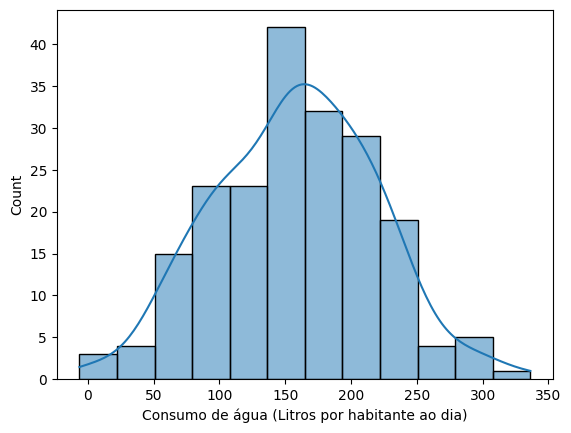

In [38]:
sns.histplot(data = df[consumo], kde = True)
plt.show()

##BloxPlot

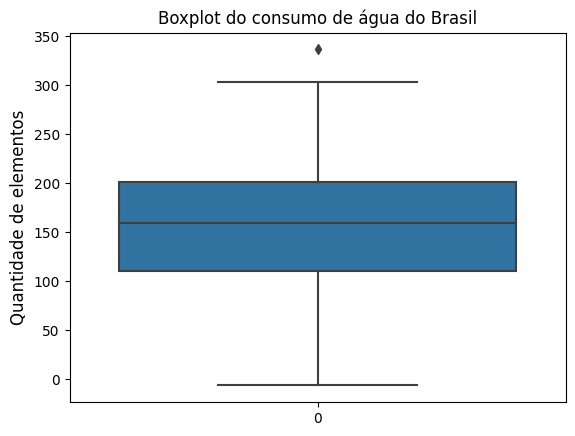

In [39]:
sns.boxplot(data=df[consumo])
plt.ylabel('Quantidade de elementos',fontsize=12)
plt.title('Boxplot do consumo de água do Brasil',fontsize=12)
plt.show()

##Média

In [40]:
media = df[consumo].mean()
round (media,2)

157.95

##Desvio padrão


In [41]:
#calcular o desvio padrão da variável
desvio = df[consumo].std()
round (desvio,2)

61.31

##Mediana

In [42]:
#calcular a mediana da variável
mediana = df[consumo].median()
round (mediana,2)

159.35

##Análise do Histograma

####Definir limites inferiores de cada intervalo:

 [𝜇 − 𝜎, 𝜇 + 𝜎], [𝜇 − 2𝜎, 𝜇 + 2𝜎] e [𝜇 − 3𝜎, 𝜇 + 3𝜎]


In [43]:
limite_inf1dp = round(media-desvio,2)
limite_inf1dp

96.64

In [44]:
limite_inf2dp = round(media-2*desvio,2)
limite_inf2dp

35.32

In [45]:
limite_inf3dp = round(media-3*desvio,2)
limite_inf3dp

-25.99

####Definir limites superiores de cada intervalo:

 [𝜇 − 𝜎, 𝜇 + 𝜎], [𝜇 − 2𝜎, 𝜇 + 2𝜎] e [𝜇 − 3𝜎, 𝜇 + 3𝜎]

In [46]:
limite_sup1dp = round(media+desvio,2)
limite_sup1dp

219.26

In [47]:
limite_sup2dp = round(media+2*desvio,2)
limite_sup2dp

280.58

In [48]:
limite_sup3dp = round(media+3*desvio,2)
limite_sup3dp

341.89

####Calculando a quantidade de dados em cada intervalo:

 [𝜇 − 𝜎, 𝜇 + 𝜎], [𝜇 − 2𝜎, 𝜇 + 2𝜎] e [𝜇 − 3𝜎, 𝜇 + 3𝜎]

In [49]:
quantidade_1dp = sum(i>=limite_inf1dp and i<=limite_sup1dp for i in df[consumo].sort_values())
quantidade_1dp

134

In [50]:
quantidade_2dp = sum(i>=limite_inf2dp and i<=limite_sup2dp for i in df[consumo].sort_values())
quantidade_2dp

191

In [51]:
quantidade_3dp = sum(i>=limite_inf3dp and i<=limite_sup3dp for i in df[consumo].sort_values())
quantidade_3dp

200

####Quantidade de dados compreendidos entre o intervalo [a, b]

In [52]:
a=94
b=222

In [53]:
quantidade_ab = sum(i>=a and i<=b for i in df[consumo].sort_values())
quantidade_ab

139

####Calculando a quantidade de dados no intervalo entre 110 e 150:


In [54]:
quantidade_4dp = sum(i>=110 and i<=150 for i in df[consumo].sort_values())
quantidade_4dp

36

####Calculo da quantidade de dados até 110 (entre 0 e 110):

In [55]:
quantidade_5dp = sum(i>=0 and i<=110 for i in df[consumo].sort_values())
quantidade_5dp

49

####Calculando a proporção de dados em cada intervalo:

 [𝜇 − 𝜎, 𝜇 + 𝜎], [𝜇 − 2𝜎, 𝜇 + 2𝜎] e [𝜇 − 3𝜎, 𝜇 + 3𝜎]

In [56]:
#Porcentagem entre + - 1 desvio padrão
porcentagem1 = round ((quantidade_1dp/len(df[consumo]))*100,2)
porcentagem1

67.0

In [57]:
porcentagem2 = round ((quantidade_2dp/len(df[consumo]))*100,2)
porcentagem2

95.5

In [58]:
porcentagem3 = round ((quantidade_3dp/len(df[consumo]))*100,2)
porcentagem3

100.0

##Análise do Boxplot

####Calculando o valor dos quartis do boxplot

Q1 = 25% dos dados da tabela |
Q3 = 75% dos dados da tabela

In [59]:
Q1 = df[consumo].quantile(q=0.25)
Q3 = df[consumo].quantile(q=0.75)
print(Q1)
Q3

110.45


200.745

####Verificando a simetria dos dados da tabela

In [60]:
s1 = mediana - Q1
s2 = Q3 - mediana
print(s1)
s2

48.90499999999999


41.390000000000015

##Gráfico Q-Q

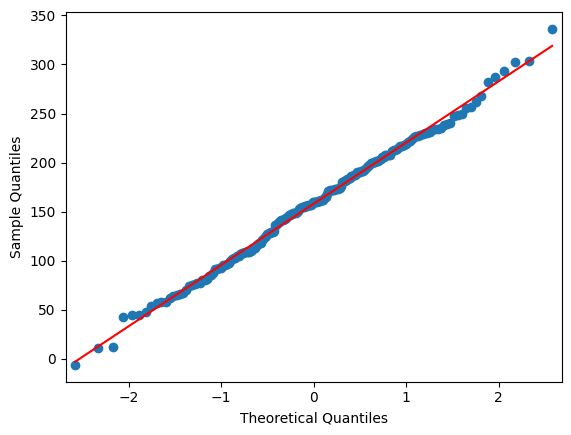

In [61]:
sm.qqplot(df[consumo],line='r')
pylab.show()

In [62]:
#P(x<=14)
norm.cdf(14,loc=media,scale=desvio).round(4)

0.0094

In [63]:
#P(x<=5)
1-norm.cdf(5,loc=media,scale=desvio).round(4)

0.9937

In [64]:
#P(x>=8 e x<=11)
norm.cdf(11,loc=media,scale=desvio).round(4)-norm.cdf(8,loc=media,scale=desvio).round(4)

0.0011000000000000003

####Valor máximo entre os 20% menores e o valor mínimo entre os 30% maiores dados da tabela

In [65]:
#P(x>=a)=0,30 Valor de x para os 30% maiores
#Como usa-se a f.d.p acumulada temos que procurar 70% menores
norm.ppf(0.70,loc=media,scale=desvio).round(2)

190.1

In [66]:
#P(x<=a)=0.20 Valor de x para os 20% menores
norm.ppf(0.20,loc=media,scale=desvio).round(2)

106.35

##Sprint 2
####Calculando a quantidade de dados no intervalo entre 0 e 150:

In [67]:
quantidade_6dp = sum(i>=0 and i<=150 for i in df[consumo].sort_values())
quantidade_6dp

85

####Proporção de dados presentes no intervalo entre 0 e 150:

In [68]:
quantidade_6dp = sum(i>=0 and i<=150 for i in df[consumo].sort_values())
proporção = (quantidade_6dp/200)*100
print(proporção,'%')

42.5 %
